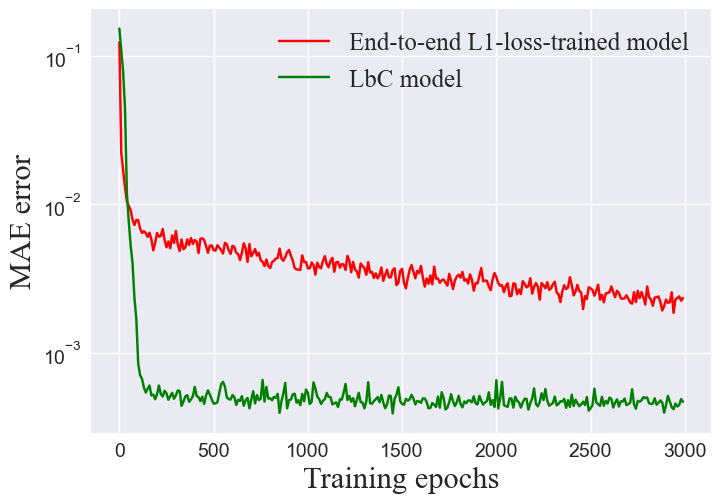

In [10]:
import torch
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
loss = torch.load('train_log/l1_testingerror.pt')
loss_lbc = torch.load('train_log/lbc_testingerror.pt')
x = torch.arange(len(loss))*10

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size':   18,}

font_l = {'family': 'Times New Roman',
        'weight': 'normal',
        'size':   22,}

plt.plot(x, loss, '-', color='r', label='End-to-end L1-loss-trained model')
plt.plot(x, loss_lbc, '-', color='g', label='LbC model')

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.set_yscale('log')
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(loc='best', prop=font)
plt.xlabel('Training epochs', font_l)
plt.ylabel('MAE error', font_l)
plt.savefig('l1_lbc_error.png',dpi=600)
plt.show()

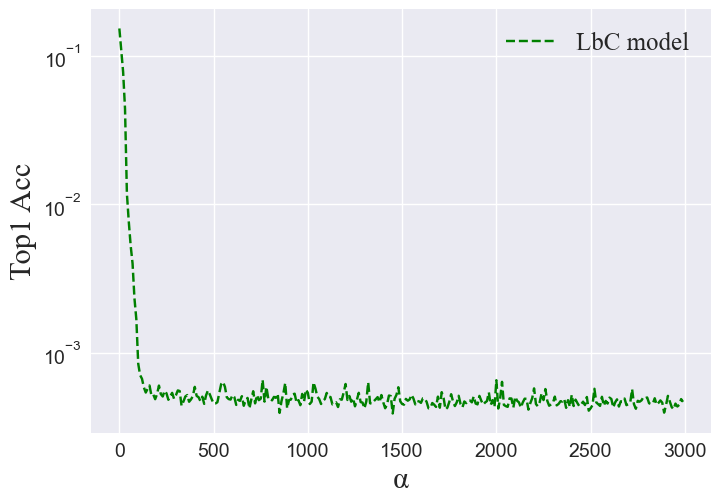

In [6]:
import torch
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
loss = torch.load('train_log/lbc_testingerror.pt')
x = torch.arange(len(loss))*10

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size':   18,}

font_l = {'family': 'Times New Roman',
        'weight': 'normal',
        'size':   22,}

plt.plot(x, loss, '--', color='g', label='LbC model')

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.set_yscale('log')
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(loc='best', prop=font)
plt.xlabel('\u03B1', font_l)
plt.ylabel('Top1 Acc', font_l)
plt.savefig('l1_test_error.png',dpi=600)
plt.show()

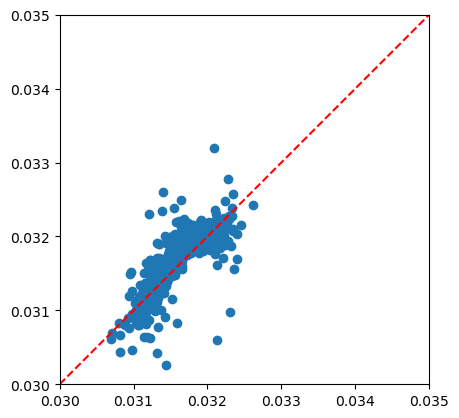

In [35]:
import torch
from models import encoder, predictor
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda:7'

enc = encoder(input_feature_num=40, hdn_size=80)
# state_dict = torch.load('train_log/lbc_checkpoints_dly1/enc_checkpoint_9999.pth.tar' , map_location="cpu")
state_dict = torch.load('train_log/lbc_checkpoints/enc_checkpoint_9999.pth.tar' , map_location="cpu")
enc.load_state_dict(state_dict)
enc.to(device)

pred = predictor(embed_size=80, target_size=2)
# state_dict = torch.load('train_log/lbc_checkpoints_dly1/pred_checkpoint_9999.pth.tar' , map_location="cpu")
state_dict = torch.load('train_log/lbc_checkpoints/pred_checkpoint_9999.pth.tar' , map_location="cpu")
pred.load_state_dict(state_dict)
pred.to(device)

# load data
data = np.load('BFMC-1000-PRE-LAY/inputdata.npy')
label = np.load('BFMC-1000-PRE-LAY/outputdata.npy')
label_original = np.load('BFMC-1000-PRE-LAY/outputdata.npy')
data= torch.as_tensor(data, dtype=torch.float).to(device)
label = torch.as_tensor(label, dtype=torch.float)
# print(torch.max(label[:,1]), torch.min(label[:,1]), torch.mean(label[:,1]))
label = torch.nn.functional.normalize(label, dim=0)
# label = label[:, 1]


def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

prediction = pred(enc(data))
# plt.scatter(label[:,0].detach().cpu(), prediction[:,0].detach().cpu())
plt.scatter(label_original[:,0].detach().cpu(), label_original[:,1].detach().cpu())
# ax.plot([-3, 3], [-3, 3], ls="--", c=".3")
ax = plt.gca()
# add_identity(ax, color='r', ls='--')
# ax.set_aspect('equal', adjustable='box')
# ax.set_xlim([0.03, 0.035])
# ax.set_ylim([0.03, 0.035])
plt.show()

